<a href="https://colab.research.google.com/github/kolmar7777/Forecasting-financial-time-series-using-a-neural-network-and-analysis-of-market-behavior/blob/home/Presentation_of_AI_for_financial_Time_Series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install simfin

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 60 kB 4.5 MB/s 


In [ ]:
import simfin as sf
from simfin.names import *
import numpy as np
import pandas as pd
# Set your API-key for downloading data.
# Replace YOUR_API_KEY with your actual API-key.
sf.set_api_key('Your_Access_Key')

# Set the local directory where data-files are stored.
# The dir will be created if it does not already exist.
sf.set_data_dir('~/simfin_data/')


*Для дальнейших разработок с другими финансовыми показателями*

In [ ]:
#comp_balance = balance[df_balance['Ticker'] == 'MSFT'].drop(columns=['Ticker', 'SimFinId'])
#comp_balance = comp_balance.rename(columns={'Report Date' : 'Date'})
#comp_price = prices[prices['Ticker'] == 'MSFT'].drop(columns=['Ticker', 'SimFinId'])

In [ ]:
#df_companies = sf.load_companies(index= 'IndustryId', market='us')

In [ ]:
#df_industries = sf.load_industries()

**STARTING OUR WORK**

Загружаем данные

In [ ]:
# Download the data from the SimFin server and load into a Pandas DataFrame.
df = sf.load_shareprices(variant='daily', market='us')

# Print the first rows of the data.
#print(df.tail())

Dataset "us-shareprices-daily" not on disk.
- Downloading ... 100.0%
- Extracting zip-file ... Done!
- Loading from disk ... Done!


Посмотрим на список полученных эмитентов

In [ ]:
#A = np.array(df[0])
Tickers_list = list(df.index.levels[0].array)
len_of_tickers_list = len(Tickers_list)
print(Tickers_list)

['A', 'AA', 'AAL', 'AAMC', 'AAME', 'AAN', 'AAOI', 'AAON', 'AAP', 'AAPL', 'AAT', 'AAWW', 'ABAX', 'ABBV', 'ABC', 'ABCB', 'ABCD', 'ABCL', 'ABEO', 'ABG', 'ABIO', 'ABM', 'ABMC', 'ABMD', 'ABNB', 'ABR', 'ABT', 'ABTL', 'ABTX', 'ABUS', 'AC', 'ACA', 'ACAD', 'ACAN', 'ACAT', 'ACC', 'ACCO', 'ACER', 'ACET', 'ACET_delis', 'ACGL', 'ACHC', 'ACI', 'ACIA', 'ACIW', 'ACLS', 'ACM', 'ACN', 'ACRX', 'ACU', 'ACW', 'ADBE', 'ADES', 'ADI', 'ADIL', 'ADM', 'ADMA', 'ADNT', 'ADOM', 'ADP', 'ADPT', 'ADPT_delis', 'ADS', 'ADSK', 'ADT', 'ADTM', 'ADTN', 'ADUS', 'ADV', 'ADVM', 'ADXS', 'AE', 'AEE', 'AEHR', 'AEIS', 'AEO', 'AEP', 'AEPI', 'AES', 'AET', 'AFG', 'AFI', 'AFL', 'AFRM', 'AFSI', 'AGCO', 'AGHI', 'AGI', 'AGIO', 'AGLE', 'AGN', 'AGNC', 'AGN_old', 'AGO', 'AGR', 'AGS', 'AGX', 'AGYS', 'AHFD', 'AHH', 'AHL', 'AHPI', 'AI', 'AIG', 'AIMC', 'AINC', 'AIR', 'AIRC', 'AIRI', 'AIT', 'AIV', 'AIZ', 'AJBI', 'AJG', 'AJRD', 'AJX', 'AKAM', 'AKR', 'AKRX', 'AKS', 'AKYA', 'AL', 'ALB', 'ALCO', 'ALE', 'ALEX', 'ALG', 'ALGN', 'ALGT', 'ALJ', 'ALJJ', 

Выбираем Ключевой эмитент и дату, с которой начнём рассмотрение (В данной работе, дата сдвигается при подгрузке, поэтому всегда беру вторую из списка в послеследующей клетке)

In [ ]:
key_Ticker_to_predict = "AAL"

rows = {
    'year': 2016,
    'month': 5,
    'day': 25,
    'hour': 00,
    'minute': 00,
    'seconds': 00}
Our_First_date_which_we_wanna_start = pd.Timestamp(rows['year'], rows['month'], rows['day'], rows['hour'], rows['minute'],rows['seconds'])
print(Our_First_date_which_we_wanna_start)
First_day_dict_for_all_tickers = list(df.index.levels[0].array)


2016-05-25 00:00:00


In [ ]:
Time_series = list(df.loc[key_Ticker_to_predict].to_dict()['Adj. Close'])
print(Time_series)
#print(Time_series.index(pd.Timestamp(2016,4,21,00,00,00)))


[Timestamp('2016-05-25 00:00:00'), Timestamp('2016-05-26 00:00:00'), Timestamp('2016-05-27 00:00:00'), Timestamp('2016-05-31 00:00:00'), Timestamp('2016-06-01 00:00:00'), Timestamp('2016-06-02 00:00:00'), Timestamp('2016-06-03 00:00:00'), Timestamp('2016-06-06 00:00:00'), Timestamp('2016-06-07 00:00:00'), Timestamp('2016-06-08 00:00:00'), Timestamp('2016-06-09 00:00:00'), Timestamp('2016-06-10 00:00:00'), Timestamp('2016-06-13 00:00:00'), Timestamp('2016-06-14 00:00:00'), Timestamp('2016-06-15 00:00:00'), Timestamp('2016-06-16 00:00:00'), Timestamp('2016-06-17 00:00:00'), Timestamp('2016-06-20 00:00:00'), Timestamp('2016-06-21 00:00:00'), Timestamp('2016-06-22 00:00:00'), Timestamp('2016-06-23 00:00:00'), Timestamp('2016-06-24 00:00:00'), Timestamp('2016-06-27 00:00:00'), Timestamp('2016-06-28 00:00:00'), Timestamp('2016-06-29 00:00:00'), Timestamp('2016-06-30 00:00:00'), Timestamp('2016-07-01 00:00:00'), Timestamp('2016-07-05 00:00:00'), Timestamp('2016-07-06 00:00:00'), Timestamp('20

In [ ]:
Our_First_date_which_we_wanna_start = Time_series[1]
print(Our_First_date_which_we_wanna_start)

2016-05-26 00:00:00


Определяем функции для проверки корректности при работе с временными рядами

In [ ]:
def Find_index_of_first_date_entry(dates_list, start_date):
  index = -1
  for i in range(len(dates_list) - 1):
    if (dates_list[i] < start_date and dates_list[i+1] >= start_date):
      index = i + 1
  return index

In [ ]:
def Hard_find_index_of_first_date_entry(dates_list, start_date):
  index = -1
  for i in range(len(dates_list)):
    if (dates_list[i] == start_date):
      index = i
  return index

In [ ]:
def Check_for_equality_of_two_times_lists(first, second):
  if (len(first) != len(second)):
    return -1
  for i in range(len(first) - 1):
    if (first[i] != second[i]):
      return -1

  return 0

Переходим к формированию матрицы с входными данными.

In [ ]:
#Calculate the first date
number_of_ticker = 0
Time_series_space = []

for ticker in Tickers_list: # Идём по всем тикерам из списка
  if ticker == key_Ticker_to_predict: # По всем кроме ключевого
    continue

  number_of_ticker += 1  #Счётчик тикеров
  Current_ticker = []    #Массив для текущего временного ряда
  dict_for_ticker = df.loc[ticker].to_dict()['Adj. Close']  # Словарь Date:Price
  dates_for_ticker = list(dict_for_ticker)                  # Список Dates
  if (number_of_ticker == 1):   #Для первого тикера предыдущий он сам же
    dates_for_prev_ticker = dates_for_ticker.copy()
    index_for_prev_ticker = Hard_find_index_of_first_date_entry(dates_for_ticker, Our_First_date_which_we_wanna_start)
  #print(dates_for_ticker[0])
  #print('Testing:', dates_for_ticker[0], "|", Our_First_date_which_we_wanna_start)
  if(dates_for_ticker[0] < Our_First_date_which_we_wanna_start): # На самом деле наша функция дальше вернула бы -1 и это условие не нужно
    index_using_our_func = Hard_find_index_of_first_date_entry(dates_for_ticker, Our_First_date_which_we_wanna_start)
    index_using_list_func = Time_series.index(Our_First_date_which_we_wanna_start)
    #print(index_using_our_func, "or = ", index_using_list_func )
    #if(index_using_our_func != index_using_list_func):
      #print("Real start date:", Our_First_date_which_we_wanna_start)
      #print("Our_func_date:", dates_for_ticker[index_using_our_func + 1])
      #print("list_func_date:", dates_for_ticker[index_using_list_func - 1])'''
    if (index_using_our_func != -1 and Check_for_equality_of_two_times_lists(dates_for_prev_ticker[index_for_prev_ticker:], dates_for_ticker[index_using_our_func:]) == 0):
      for date in dates_for_ticker[index_using_our_func:]:
        Current_ticker.append(dict_for_ticker[date])
      Time_series_space.append(Current_ticker)
      dates_for_prev_ticker = dates_for_ticker.copy()
      index_for_prev_ticker = index_using_our_func
  
  print(number_of_ticker, 'from', len_of_tickers_list, 'done', len(Time_series_space))
    

print(Time_series_space[0:10])


1 from 2883 done 1
2 from 2883 done 1
3 from 2883 done 2
4 from 2883 done 3
5 from 2883 done 3
6 from 2883 done 4
7 from 2883 done 5
8 from 2883 done 6
9 from 2883 done 7
10 from 2883 done 8
11 from 2883 done 9
12 from 2883 done 9
13 from 2883 done 10
14 from 2883 done 11
15 from 2883 done 12
16 from 2883 done 12
17 from 2883 done 12
18 from 2883 done 13
19 from 2883 done 14
20 from 2883 done 15
21 from 2883 done 16
22 from 2883 done 16
23 from 2883 done 17
24 from 2883 done 17
25 from 2883 done 18
26 from 2883 done 19
27 from 2883 done 20
28 from 2883 done 21
29 from 2883 done 22
30 from 2883 done 23
31 from 2883 done 23
32 from 2883 done 24
33 from 2883 done 25
34 from 2883 done 25
35 from 2883 done 26
36 from 2883 done 27
37 from 2883 done 27
38 from 2883 done 27
39 from 2883 done 27
40 from 2883 done 28
41 from 2883 done 29
42 from 2883 done 29
43 from 2883 done 29
44 from 2883 done 30
45 from 2883 done 31
46 from 2883 done 32
47 from 2883 done 33
48 from 2883 done 34
49 from 2883 

Получаем отдельно вектор ключевых значений

In [ ]:
#выделяем ключевой тикер как вектор меток
Key_ticker_values_dict = df.loc[key_Ticker_to_predict].to_dict()['Open']
Key_ticker_values_list = []
if (Check_for_equality_of_two_times_lists(list(Key_ticker_values_dict), dates_for_prev_ticker) == 0):
  for date in list(Key_ticker_values_dict)[2:]:
    Key_ticker_values_list.append(Key_ticker_values_dict[date])
print(Key_ticker_values_list) 

[31.6, 31.75, 31.94, 31.67, 31.59, 30.77, 31.46, 32.63, 32.25, 32.8, 32.99, 31.81, 30.65, 29.8, 29.1, 29.75, 30.29, 30.05, 30.25, 28.2, 26.85, 26.12, 26.94, 27.86, 28.26, 29.09, 27.76, 28.39, 29.8, 30.23, 32.78, 35.0, 35.11, 35.51, 36.03, 35.78, 36.07, 35.1, 36.45, 36.35, 35.91, 36.5, 36.07, 36.26, 35.54, 35.39, 33.47, 33.57, 33.71, 34.22, 35.21, 34.59, 34.25, 34.74, 34.96, 35.67, 36.68, 36.43, 36.44, 36.33, 36.32, 36.27, 36.34, 36.68, 36.13, 35.45, 36.97, 36.53, 36.0, 36.45, 37.5, 38.68, 39.0, 37.22, 38.12, 37.0, 36.31, 36.26, 35.66, 35.75, 35.0, 34.96, 35.3, 35.19, 34.98, 36.1, 35.65, 35.98, 36.46, 38.39, 37.82, 37.83, 38.25, 37.95, 39.99, 38.12, 36.95, 39.45, 38.66, 38.84, 39.48, 40.93, 39.97, 40.25, 39.66, 38.57, 39.45, 39.85, 40.31, 40.51, 39.72, 39.78, 39.27, 40.39, 41.42, 40.76, 42.71, 42.07, 43.01, 45.0, 44.66, 44.39, 46.15, 46.46, 46.03, 46.05, 46.34, 46.64, 46.59, 46.14, 46.2, 46.09, 46.45, 46.16, 46.61, 48.6, 49.27, 49.16, 47.94, 47.84, 48.1, 48.61, 47.89, 48.5, 49.34, 49.35

In [ ]:
#test_19 = df.loc['A'].to_dict()['Adj. Close']
test_19 = df.loc['A'].to_dict()['Open']
print(test_19)
print(Time_series_space[0])
#test_20 = df.loc['AAL'].to_dict()['Adj. Close']
test_20 = df.loc['AAL'].to_dict()['Open']
print(test_20)
print(Time_series_space[1])

{Timestamp('2016-05-25 00:00:00'): 45.12, Timestamp('2016-05-26 00:00:00'): 45.58, Timestamp('2016-05-27 00:00:00'): 45.55, Timestamp('2016-05-31 00:00:00'): 45.79, Timestamp('2016-06-01 00:00:00'): 45.75, Timestamp('2016-06-02 00:00:00'): 45.91, Timestamp('2016-06-03 00:00:00'): 45.73, Timestamp('2016-06-06 00:00:00'): 45.72, Timestamp('2016-06-07 00:00:00'): 45.81, Timestamp('2016-06-08 00:00:00'): 45.75, Timestamp('2016-06-09 00:00:00'): 45.98, Timestamp('2016-06-10 00:00:00'): 45.73, Timestamp('2016-06-13 00:00:00'): 45.32, Timestamp('2016-06-14 00:00:00'): 44.7, Timestamp('2016-06-15 00:00:00'): 45.11, Timestamp('2016-06-16 00:00:00'): 44.72, Timestamp('2016-06-17 00:00:00'): 45.42, Timestamp('2016-06-20 00:00:00'): 45.57, Timestamp('2016-06-21 00:00:00'): 46.21, Timestamp('2016-06-22 00:00:00'): 46.15, Timestamp('2016-06-23 00:00:00'): 46.5, Timestamp('2016-06-24 00:00:00'): 44.56, Timestamp('2016-06-27 00:00:00'): 43.63, Timestamp('2016-06-28 00:00:00'): 42.67, Timestamp('2016-0

Срезаем последний столбец матрицы (это необходимо в виду рекурентного определения тренда и проблемы с граничными точками)

In [ ]:
Time_series_space_end = []
for row in Time_series_space:
  Time_series_space_end.append(row[:-1])
print(Time_series_space_end[1][:])

[16.97, 18.08, 19.08, 19.5, 21.32, 22.36, 24.37, 22.36, 22.28, 20.66, 18.93, 16.63, 16.84, 16.92, 16.56, 17.95, 17.61, 17.0, 16.03, 16.25, 14.98, 13.5, 14.0, 14.55, 14.57, 14.79, 13.85, 13.71, 13.5, 13.43, 13.97, 13.84, 13.91, 13.53, 13.7, 13.5, 12.94, 13.77, 14.3, 15.27, 13.83, 13.41, 13.03, 13.08, 12.86, 12.55, 12.84, 12.65, 12.77, 13.11, 13.6, 13.28, 12.84, 13.11, 13.3, 13.68, 13.71, 13.62, 14.06, 14.14, 13.54, 13.59, 13.3, 12.72, 12.8, 13.15, 13.52, 14.13, 14.45, 13.47, 13.16, 13.22, 13.1, 13.5, 13.79, 13.71, 13.98, 13.82, 13.9, 14.46, 14.77, 16.4, 17.1, 16.6, 15.45, 16.23, 16.78, 16.8, 18.5, 21.95, 21.18, 21.26, 22.25, 25.04, 28.04, 33.65, 49.0, 41.2, 35.0, 33.45, 37.95, 34.25, 36.65, 38.55, 37.55, 32.85, 32.95, 32.5, 32.88, 34.15, 35.05, 35.5, 35.95, 36.7, 35.1, 34.15, 36.5, 36.6, 36.6, 33.0, 32.5, 30.25, 29.0, 28.2, 27.6, 28.5, 29.0, 28.9, 29.95, 28.9, 28.85, 27.6, 28.0, 29.0, 33.0, 37.05, 41.55, 42.5, 42.0, 41.85, 43.8, 46.85, 53.95, 48.0, 45.25, 51.5, 52.65, 53.8, 57.75, 51.8,

Проверка на корректность размерностей

In [ ]:
current_len_of_row = len(Time_series_space_end[0])
#print(len(Time_series_space[0]))
for row in Time_series_space_end:
  if (len(row) != current_len_of_row): # Эта цифра всё время меняется! Узнаём актуальную через len(Time_series_space[0])
    print(len(row))
if (len(Key_ticker_values_list) != current_len_of_row):
  print(len(Key_ticker_values_list), current_len_of_row)

Перевод в NumPy array

In [ ]:
len_of_each_row = len(Time_series_space_end[0])
len_of_each_column = len(Time_series_space_end)
temp = []
for row in Time_series_space_end:
  for element in row:
    temp.append(element)
matr = np.array(temp).reshape(len_of_each_column, len_of_each_row)
print(matr)

[[ 43.31  43.61  43.67 ... 131.43 131.58 132.61]
 [ 16.97  18.08  19.08 ...  17.69  17.47  17.06]
 [  3.33   3.45   3.57 ...   4.09   4.28   4.14]
 ...
 [  7.85   7.76   7.77 ...   2.21   2.21   2.22]
 [  7.59   7.75   8.74 ...   4.86   4.84   4.68]
 [  0.28   0.22   0.27 ...  13.24  13.29  13.21]]


***Задаём границу для определения тренда!***

In [ ]:
Boundary_for_neutral_trend = 1 # 1% DR

формируем вектор меток, соответствующий классам тренда.

In [ ]:
#выделяем ключевой тикер как вектор меток: 1 - нет роста на утро следующего дня для ключевого тикера(падение цены). 2 - есть, 0 - падение.
Key_ticker_values_dict = df.loc[key_Ticker_to_predict].to_dict()['Open']
Key_ticker_values_list1 = []
dates_of_Key_ticker = list(Key_ticker_values_dict)
if (Check_for_equality_of_two_times_lists(dates_of_Key_ticker, dates_for_prev_ticker) == 0):
  for date in dates_of_Key_ticker[1:]:
    if date == dates_of_Key_ticker[1]:
      prev_date = date
      continue
    if abs(((Key_ticker_values_dict[date] - Key_ticker_values_dict[prev_date]) / Key_ticker_values_dict[prev_date])*100) <= Boundary_for_neutral_trend:
      Key_ticker_values_list1.append([0,1,0].index(1))
    elif ((Key_ticker_values_dict[date] - Key_ticker_values_dict[prev_date]) / Key_ticker_values_dict[prev_date])*100 > Boundary_for_neutral_trend: # Изменение больше 1 % вверх
      Key_ticker_values_list1.append([0,0,1].index(1)) # Восходящий
    else:
      Key_ticker_values_list1.append([1,0,0].index(1)) # Нисходящий
    
    prev_date = date
print(len(Key_ticker_values_list1), len(matr[0]), Key_ticker_values_list1) 

1257 1257 [0, 1, 1, 1, 1, 0, 2, 2, 0, 2, 1, 0, 0, 0, 0, 2, 2, 1, 1, 0, 0, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 1, 2, 2, 1, 1, 0, 2, 1, 0, 2, 0, 1, 0, 1, 0, 1, 1, 2, 2, 0, 1, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 2, 2, 2, 1, 0, 2, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 2, 0, 1, 2, 2, 0, 1, 2, 1, 2, 0, 0, 2, 0, 1, 2, 2, 0, 1, 0, 0, 2, 2, 2, 1, 0, 1, 0, 2, 2, 0, 2, 0, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 0, 1, 1, 2, 0, 2, 2, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 2, 2, 0, 0, 0, 1, 1, 1, 1, 0, 2, 2, 2, 0, 0, 1, 0, 2, 2, 2, 0, 1, 2, 1, 2, 1, 1, 0, 1, 0, 1, 1, 1, 1, 2, 1, 0, 2, 0, 1, 1, 0, 1, 0, 0, 2, 1, 1, 1, 0, 2, 2, 0, 2, 2, 0, 2, 1, 1, 0, 1, 1, 1, 2, 2, 0, 0, 2, 1, 2, 2, 1, 2, 1, 0, 1, 0, 0, 2, 2, 1, 2, 2, 2, 1, 0, 0, 2, 0, 0, 1, 2, 2, 2, 1, 2, 2, 1, 1, 2, 1, 1, 1, 2, 2, 0, 0, 1, 0, 1, 1, 1, 0, 2, 0, 1, 1, 1, 1, 2, 2, 1, 2, 2, 2, 1, 2, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 2, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 2, 0, 1, 1, 1, 1, 0, 2, 1, 1, 2, 1, 1, 0, 2,

Формируем матрицу со значениями тренда

In [ ]:
trend_matr = []
for i in range(len(matr)):
  trend_row = []
  for j in range(len(matr[i])):
    if j == 0:
      prev_value = matr[i][j]
      value = matr[i][j]
      trend_row.append(int(1))
      continue
    value = matr[i][j]
    if abs(((value - prev_value) / prev_value)*100) <= Boundary_for_neutral_trend:
      trend_row.append(int(1))
    elif ((value - prev_value) / prev_value)*100 > Boundary_for_neutral_trend: # Изменение больше 1 % вверх
      trend_row.append(int(2)) # Восходящий
    else:
      trend_row.append(int(0)) # Нисходящий
    prev_value = value
  trend_matr.append(trend_row)
  #print(trend_row)

print("Примеров = ", len(trend_matr[0]), ",Признаков = " , len(trend_matr)) 

Примеров =  1257 ,Признаков =  2010


Нормируем матрицу, которая была получена для значений цены

In [ ]:
temp_1 = []
for row in matr:
  new_row = row / np.linalg.norm(row)
  temp_1.append(new_row)

normed_matr = np.array(temp_1).reshape(len_of_each_column, len_of_each_row)
print(type(normed_matr))
print(normed_matr)

<class 'numpy.ndarray'>
[[0.01603704 0.01614812 0.01617034 ... 0.04866654 0.04872209 0.04910348]
 [0.00990851 0.01055662 0.0111405  ... 0.0103289  0.01020045 0.00996106]
 [0.03128015 0.03240737 0.03353458 ... 0.03841917 0.04020392 0.03888884]
 ...
 [0.02965862 0.02931859 0.02935637 ... 0.00834975 0.00834975 0.00838753]
 [0.02069652 0.02113282 0.02383236 ... 0.01325232 0.01319778 0.01276149]
 [0.00093414 0.00073396 0.00090077 ... 0.04417134 0.04433815 0.04407125]]


Очередная проверка размерностей

In [ ]:
current_len_of_row = len(trend_matr[0])
#print(len(Time_series_space[0]))
for row in trend_matr:
  if (len(row) != current_len_of_row): # Эта цифра всё время меняется! Узнать актуальную через len(Time_series_space[0])
    print(len(row))
if (len(Key_ticker_values_list1) != current_len_of_row):
  print(len(Key_ticker_values_list1))

Подключаем Torch и переводим матрицу в тензор

In [ ]:
import torch
data = torch.from_numpy(normed_matr)

In [ ]:
#Check_for_key_ticker_correctness
if(len(trend_matr[0]) == len(Key_ticker_values_list1)):
  print("CORRECT!")
print(len(trend_matr[0]))
print(len(Time_series_space_end[0]))
print(len(Key_ticker_values_list1))

CORRECT!
1257
1257
1257


In [ ]:
print(len(trend_matr)) 

2010


In [ ]:
Dataset1 = np.array(trend_matr).T
len(Dataset1)

1257

In [ ]:
#Отрезаем начало, где тренд везде нейтральный.
print(Dataset1[0:2], Key_ticker_values_list1[0:2])
Key_ticker_values_list = Key_ticker_values_list1[1:]
Dataset = Dataset1[1:]
print(len(Dataset), len(Key_ticker_values_list))
print(Dataset[0], Key_ticker_values_list[0])

[[1 1 1 ... 1 1 1]
 [1 2 2 ... 0 2 0]] [0, 1]
1256 1256
[1 2 2 ... 0 2 0] 1


Эта утилита нужна исключительно для отображения информации об обучении и упрощения интерфейса в самом процессе обучения.

In [ ]:
if 'google.colab' in str(get_ipython()):
    import ssl
    import sys

    !wget https://raw.githubusercontent.com/adasegroup/ML2020_seminars/master/seminar13/utils.py -P local_modules -nc
    sys.path.append('local_modules')

    ssl._create_default_https_context = ssl._create_unverified_context

--2022-05-25 14:48:45--  https://raw.githubusercontent.com/adasegroup/ML2020_seminars/master/seminar13/utils.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2432 (2.4K) [text/plain]
Saving to: ‘local_modules/utils.py’

utils.py            100%[===================>]   2.38K  --.-KB/s    in 0s      

2022-05-25 14:48:45 (32.4 MB/s) - ‘local_modules/utils.py’ saved [2432/2432]



In [ ]:
from torch.utils.data import DataLoader
import numpy as np
import matplotlib.pyplot as plt
import torch
import torchvision
from tqdm import trange

import utils as seminar_utils

In [ ]:
#loss_function = torch.nn.MSELoss()
loss_function = torch.nn.CrossEntropyLoss()

Разбиваем выборку на обучающую и валидационную

In [ ]:
length_of_Dataset = len(Dataset)
Key_ticker_values_list_test = Key_ticker_values_list
train_data = torch.as_tensor(Dataset[ : int(length_of_Dataset*3/4)]).type(torch.float32)
train_target = torch.as_tensor(Key_ticker_values_list[ : int(length_of_Dataset*3/4)]).type(torch.float32)
test_data = torch.as_tensor(Dataset[int(length_of_Dataset*3/4) : ]).type(torch.float32)
test_target = torch.as_tensor(Key_ticker_values_list_test[int(length_of_Dataset*3/4) : ]).type(torch.float32)
#train_data = torch.as_tensor(Dataset[ : int(length_of_Dataset*3/4)]).type(torch.float32)
#train_target = torch.as_tensor(Key_ticker_values_list[ : int(length_of_Dataset*3/4)]).type(torch.int)
#test_data = torch.as_tensor(Dataset[int(length_of_Dataset*3/4) : ]).type(torch.float32)
#test_target = torch.as_tensor(Key_ticker_values_list_test[int(length_of_Dataset*3/4) : ]).type(torch.int)
#Testing
print(len(train_data) == len(train_target))
print(len(test_data) == len(test_target))
print("Длина тестовой выборки = ", len(test_data))
print("Длина обучающей выборки = ", len(train_data))
print(len(test_data)/ len(train_data) * 100,"%")


True
True
Длина тестовой выборки =  314
Длина обучающей выборки =  942
33.33333333333333 %


Посмотрим когда примерно начинается наша тестовая валидационная выборка.

In [ ]:
Key_ticker_values_dict_bla_bla = list(df.loc[key_Ticker_to_predict].to_dict()['Open'])[int(length_of_Dataset*3/4) : ]
print(Key_ticker_values_dict_bla_bla)

[Timestamp('2020-02-24 00:00:00'), Timestamp('2020-02-25 00:00:00'), Timestamp('2020-02-26 00:00:00'), Timestamp('2020-02-27 00:00:00'), Timestamp('2020-02-28 00:00:00'), Timestamp('2020-03-02 00:00:00'), Timestamp('2020-03-03 00:00:00'), Timestamp('2020-03-04 00:00:00'), Timestamp('2020-03-05 00:00:00'), Timestamp('2020-03-06 00:00:00'), Timestamp('2020-03-09 00:00:00'), Timestamp('2020-03-10 00:00:00'), Timestamp('2020-03-11 00:00:00'), Timestamp('2020-03-12 00:00:00'), Timestamp('2020-03-13 00:00:00'), Timestamp('2020-03-16 00:00:00'), Timestamp('2020-03-17 00:00:00'), Timestamp('2020-03-18 00:00:00'), Timestamp('2020-03-19 00:00:00'), Timestamp('2020-03-20 00:00:00'), Timestamp('2020-03-23 00:00:00'), Timestamp('2020-03-24 00:00:00'), Timestamp('2020-03-25 00:00:00'), Timestamp('2020-03-26 00:00:00'), Timestamp('2020-03-27 00:00:00'), Timestamp('2020-03-30 00:00:00'), Timestamp('2020-03-31 00:00:00'), Timestamp('2020-04-01 00:00:00'), Timestamp('2020-04-02 00:00:00'), Timestamp('20

Создаём свой класс Датасет, наследуемый из соответствующего класса в модуле Torch-а

In [ ]:
from torch.utils.data import Dataset

class CreateDataset(Dataset):
    def __init__(self, gen_data, targets):
        self.samples = []
        if (len(gen_data) == len(targets)):      
          for i in range(len(gen_data)):
            self.samples.append((gen_data[i], int(targets[i])))

        

    def __len__(self):
        return len(self.samples)

    def __getitem__(self, idx):
        return self.samples[idx]

Тестируем DataLoader с нашим Dataset-ом

In [ ]:
train_dataset = CreateDataset(train_data, train_target)
val_dataset = CreateDataset(test_data, test_target)
print(len(train_dataset), train_dataset[0])
print(len(val_dataset), val_dataset[0])

942 (tensor([1., 2., 2.,  ..., 0., 2., 0.]), 1)
314 (tensor([1., 0., 2.,  ..., 0., 0., 1.]), 0)


In [ ]:
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, num_workers=2, shuffle=False)

In [ ]:
for batch_i, (input_tensor, target_tensor) in enumerate(train_loader):
    print(batch_i)
    print(input_tensor.shape, target_tensor.shape)
    print(target_tensor[:5])
    #break

0
torch.Size([64, 2010]) torch.Size([64])
tensor([1, 1, 1, 1, 0])
1
torch.Size([64, 2010]) torch.Size([64])
tensor([0, 2, 0, 0, 2])
2
torch.Size([64, 2010]) torch.Size([64])
tensor([1, 1, 1, 1, 1])
3
torch.Size([64, 2010]) torch.Size([64])
tensor([2, 0, 1, 1, 0])
4
torch.Size([64, 2010]) torch.Size([64])
tensor([1, 1, 2, 2, 0])
5
torch.Size([64, 2010]) torch.Size([64])
tensor([0, 2, 1, 1, 2])
6
torch.Size([64, 2010]) torch.Size([64])
tensor([1, 1, 2, 1, 1])
7
torch.Size([64, 2010]) torch.Size([64])
tensor([2, 2, 1, 0, 1])
8
torch.Size([64, 2010]) torch.Size([64])
tensor([2, 0, 1, 1, 1])
9
torch.Size([64, 2010]) torch.Size([64])
tensor([2, 0, 1, 1, 2])
10
torch.Size([64, 2010]) torch.Size([64])
tensor([1, 0, 1, 1, 2])
11
torch.Size([64, 2010]) torch.Size([64])
tensor([1, 1, 0, 2, 0])
12
torch.Size([64, 2010]) torch.Size([64])
tensor([1, 2, 0, 0, 1])
13
torch.Size([64, 2010]) torch.Size([64])
tensor([1, 0, 0, 1, 0])
14
torch.Size([46, 2010]) torch.Size([46])
tensor([0, 2, 2, 1, 1])


Двухслойная линейная модель

In [ ]:
class MLP(torch.nn.Module):
    def __init__(self, input_size, hidden_dim_size, number_of_targets):
        r"""
        Parameters
        ----------
        input_size : int
        hidden_dim_size : int
        number_of_targets : int
        """
        super().__init__()
        
        #input_size = input_image_size[0] * input_image_size[1] * input_image_size[2]
        #number_of_targets = 1
        self.mlp = torch.nn.Sequential(
            torch.nn.Linear(input_size, hidden_dim_size),
            torch.nn.ReLU(),
            torch.nn.BatchNorm1d(hidden_dim_size),
            torch.nn.Linear(hidden_dim_size, number_of_targets)
        )
        
    def forward(self, x):
        r"""
        Parameters
        ----------
        x : torch.Tensor
            of shape [batch_size, vector_size]
        
        Returns
        -------
        y : torch.Tensor
            of shape [batch_size, 1]
        """
        batch_size = len(x)
        x = x.reshape(batch_size, -1)
        return self.mlp(x)

Пробуем работать с батчами

In [ ]:
inputs, targets = next(iter(train_loader))
inputs.shape

torch.Size([64, 2010])

In [ ]:
model = MLP(input_size = inputs.shape[1], hidden_dim_size = 120, number_of_targets = 3)
nn_outputs = model(inputs)
nn_outputs.shape
print(nn_outputs)

tensor([[ 4.6530e-01, -1.1930e-01, -3.3948e-01],
        [-4.9052e-01,  5.9084e-01,  2.5818e-01],
        [ 6.2438e-01,  2.5369e-01,  1.8345e-01],
        [-3.7682e-01, -1.0865e-02,  1.0998e-01],
        [ 5.7150e-02,  8.7595e-01, -1.1276e-01],
        [ 8.1872e-01, -5.2440e-01,  4.5925e-01],
        [-8.2203e-02,  1.7107e-01, -1.7266e-01],
        [-7.0550e-01,  7.4771e-01, -1.6356e-01],
        [-1.7122e-01,  1.3193e+00, -8.0620e-02],
        [ 6.1563e-01,  1.2406e+00, -8.5307e-01],
        [-7.8056e-01,  7.3178e-01, -2.6261e-01],
        [-4.8920e-01, -2.4497e-01,  3.4742e-01],
        [ 3.0226e-01, -8.1481e-01,  8.8519e-01],
        [-5.4552e-01,  7.8044e-01, -1.2423e-01],
        [ 1.1534e+00, -2.6598e-02,  3.0263e-01],
        [-8.2637e-01, -8.9423e-01, -9.5373e-01],
        [-4.3640e-01,  9.2120e-02, -4.0255e-01],
        [-4.9620e-01,  9.8585e-02,  5.2407e-01],
        [-5.5731e-01,  2.4472e-02, -1.4586e-02],
        [ 7.9244e-01, -1.5747e+00,  7.4141e-01],
        [ 3.7294e-01

Определяем универсальную функцию тренировки нейронной сети

In [ ]:
# we choose the device that we will work on --- GPU or CPU
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')


def train(model, optimizer, loss_function, train_loader, val_loader, device, epochs_n=1, plot_each=1):
    # send the model to that device
    model = model.to(device)
    # initialize some visualization code that you don't need to care about
    monitor = seminar_utils.Monitor()
    # one full cycle on train data is called epoch
    for epoch in trange(epochs_n):
        # switch the model to the train mode
        # later on we will have some modules that function differently in train and test mode
        model.train()
        for model_input, target in train_loader:
            # send data to device
            model_input = model_input.to(device)
            #print(model_input)
            target = target.to(device)
            # calculate outputs and loss
            model_output = model(model_input)
            loss = loss_function(model_output, target)
            #print("Loss_function = ",loss, "DATA = ", model_output, target)
            # update model weights
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            # do some visualization
            monitor.add_loss_value(loss.item())
        
        # evaluate the model
        # switch the model to the test mode
        model.eval()
        train_accuracy = seminar_utils.get_accuracy(model, train_loader, device)
        val_accuracy = seminar_utils.get_accuracy(model, val_loader, device)
        monitor.add_train_accuracy_value(train_accuracy)
        monitor.add_val_accuracy_value(val_accuracy)
        
        if epoch % plot_each == 0:
            monitor.show()

    #plt.savefig("Result:\n"+
    #        "b_s="+str(batch_size)+"\n"+
    #        "h_d_sp="+str(hidden_dim_size)+"\n"+
    #        "B_4_no_trend="+str(Boundary_for_neutral_trend)+"%\n"+
    #        "loss_function="+str(loss_function)+"\n"+
    #        "epochs="+str(epochs) +
    #        ".png", dpi = 400, quality = 100)


Задаём необходимые архитектурные параметры и обучаем нейронную сеть

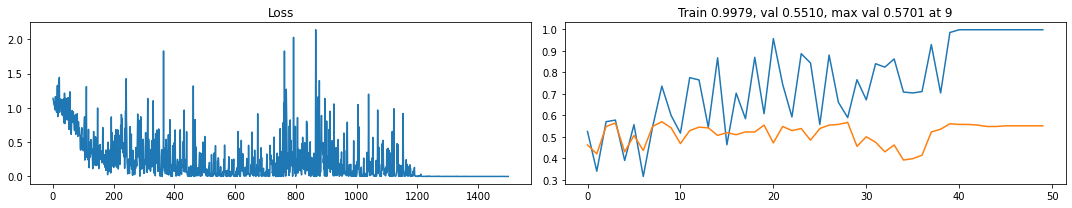

100%|██████████| 50/50 [01:21<00:00,  1.63s/it]


In [ ]:
seminar_utils.set_random_seeds(device=device)
#batch_size = inputs.shape[1]
batch_size = 32
epochs = 50
hidden_dim_size = 32
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, num_workers=4)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=batch_size, num_workers=4)

model = MLP(input_size = inputs.shape[1], hidden_dim_size =  hidden_dim_size, number_of_targets = 3)
#loss_function = torch.nn.MSELoss()
loss_function =torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-1, momentum=0.9)
#optimizer = torch.optim.Adam(model.parameters())
scheduler = torch.optim.lr_scheduler.MultiStepLR(optimizer, milestones=(int(epochs/10), int(epochs/3)), gamma=1/10)

train(model, optimizer, loss_function, train_loader, val_loader, device, epochs_n=epochs)
#plt.savefig("Result:\n"+
#            "b_s="+str(batch_size)+"\n"+
#            "h_d_sp="+str(hidden_dim_size)+"\n"+
#            "B_4_no_trend="+str(Boundary_for_neutral_trend)+"%\n"+
#            "loss_function="+str(loss_function)+"\n"+
#            "epochs="+str(epochs) +
#            ".png", dpi = 400, quality = 100)

Сеть поглубже

In [ ]:
class MLP_2(torch.nn.Module):
    def __init__(self, input_size, hidden_dim_size, number_of_targets):
        r"""
        Parameters
        ----------
        input_size : int
        hidden_dim_size : int
        number_of_targets : int
        """
        super().__init__()
        
        #input_size = input_image_size[0] * input_image_size[1] * input_image_size[2]
        #number_of_targets = 1
        self.mlp = torch.nn.Sequential(
            torch.nn.Linear(input_size, hidden_dim_size),
            torch.nn.ReLU(),
            torch.nn.BatchNorm1d(hidden_dim_size),
            torch.nn.Linear(hidden_dim_size, hidden_dim_size),
            torch.nn.ReLU(),
            torch.nn.BatchNorm1d(hidden_dim_size),
            torch.nn.Linear(hidden_dim_size, hidden_dim_size),
            torch.nn.ReLU(),
            torch.nn.BatchNorm1d(hidden_dim_size),
            torch.nn.Linear(hidden_dim_size, number_of_targets)
        )
        
    def forward(self, x):
        r"""
        Parameters
        ----------
        x : torch.Tensor
            of shape [batch_size, vector_size]
        
        Returns
        -------
        y : torch.Tensor
            of shape [batch_size, 1]
        """
        batch_size = len(x)
        x = x.reshape(batch_size, -1)
        return self.mlp(x)

В конце данной тренировки смотрим на распределение по классам полученных ответов на $(epochs_n - 2)$ эпохе

In [ ]:
# we choose the device that we will work on --- GPU or CPU
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')


def train(model, optimizer, loss_function, train_loader, val_loader, device, epochs_n=1, plot_each=1):
    # send the model to that device
    model = model.to(device)
    flag = 0
    # initialize some visualization code that you don't need to care about
    monitor = seminar_utils.Monitor()
    # one full cycle on train data is called epoch
    for epoch in trange(epochs_n):
        # switch the model to the train mode
        # later on we will have some modules that function differently in train and test mode
        model.train()
        for model_input, target in train_loader:
            # send data to device
            model_input = model_input.to(device)
            #print(model_input)
            target = target.to(device)
            # calculate outputs and loss
            model_output = model(model_input)
            loss = loss_function(model_output, target)
            #print("Loss_function = ",loss, "DATA = ", model_output, target)
            # update model weights
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            # do some visualization
            monitor.add_loss_value(loss.item())
        
        # evaluate the model
        # switch the model to the test mode
        model.eval()
        train_accuracy = seminar_utils.get_accuracy(model, train_loader, device)
        val_accuracy = seminar_utils.get_accuracy(model, val_loader, device)
        monitor.add_train_accuracy_value(train_accuracy)
        monitor.add_val_accuracy_value(val_accuracy)
        
        if epoch % plot_each == 0:
            monitor.show()

        if (epoch == epochs_n - 2):
          save_list_pred = []
          with torch.no_grad():
            for x, y in val_loader:
              x = x.to(device)
              y = y.to(device)
              prediction = model(x).argmax(dim=-1, keepdim=True)
              save_list_pred.append(prediction)
        if (epoch == epochs_n - 1):
          #print(save_list_pred)
          general_answer = []
          for tens in save_list_pred:
            for elem in tens:
              general_answer.append(elem.tolist()[0])
          print(general_answer.count(0), general_answer.count(1), general_answer.count(2))
          vals = [general_answer.count(0), general_answer.count(1), general_answer.count(2)]
          labels = ["Убывающий", "боковой", "Восходящий"]
          fig, ax = plt.subplots()
          ax.pie(vals, labels=labels)
          ax.axis("equal")

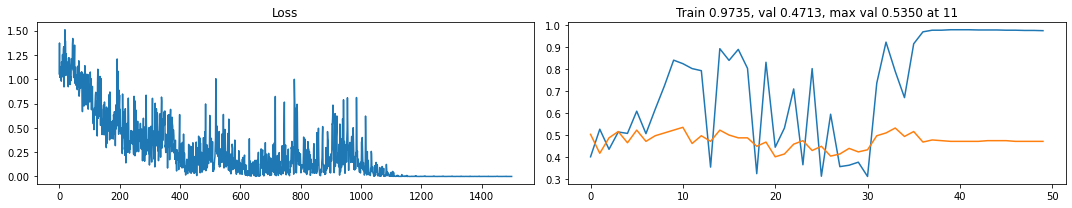

100%|██████████| 50/50 [01:29<00:00,  1.79s/it]


In [ ]:
seminar_utils.set_random_seeds(device=device)
#batch_size = inputs.shape[1]
batch_size = 32
epochs = 50
hidden_dim_size = 32
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, num_workers=4)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=batch_size, num_workers=4)

model = MLP_2(input_size = inputs.shape[1], hidden_dim_size =  hidden_dim_size, number_of_targets = 3)
#loss_function = torch.nn.MSELoss()
loss_function =torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-1, momentum=0.9)
#optimizer = torch.optim.Adam(model.parameters())
scheduler = torch.optim.lr_scheduler.MultiStepLR(optimizer, milestones=(int(epochs/10), int(epochs/3)), gamma=1/10)

train(model, optimizer, loss_function, train_loader, val_loader, device, epochs_n=epochs)

пара LSTM клеток внутри линейных слоёв

In [ ]:
from torch.nn.modules.rnn import LSTMCell
class LSTM(torch.nn.Module):
    def __init__(self, input_size, hidden_dim_size, number_of_targets):
        r"""
        Parameters
        ----------
        input_size : int
        hidden_dim_size : int
        number_of_targets : int
        """
        super(LSTM, self).__init__()

        self.hidden_layers = 64
        self.hidden_layers2 = 32
        
        #input_size = input_image_size[0] * input_image_size[1] * input_image_size[2]
        #number_of_targets = 1

        self.stage1 = torch.nn.Sequential(
            torch.nn.Linear(input_size, hidden_dim_size),
            #torch.nn.RNN(input_size, 20, hidden_dim_size),
            torch.nn.ReLU(),
            torch.nn.BatchNorm1d(hidden_dim_size),  ## <---
            torch.nn.Linear(hidden_dim_size, 3)
        )
        self.lstm1 = torch.nn.LSTMCell(3, self.hidden_layers)
        self.lstm2 = torch.nn.LSTMCell(self.hidden_layers, self.hidden_layers2)
        self.stage2 = torch.nn.Sequential(
            torch.nn.Linear(self.hidden_layers2, hidden_dim_size),
            torch.nn.ReLU(),
            torch.nn.BatchNorm1d(hidden_dim_size),
            torch.nn.Linear(hidden_dim_size, number_of_targets)
        )
        
    def forward(self, x):
        r"""
        Parameters
        ----------
        x : torch.Tensor
            of shape [batch_size, vector_size]
        
        Returns
        -------
        y : torch.Tensor
            of shape [batch_size, 1]
        """
        batch_size = len(x)
        x = x.reshape(batch_size, -1)
        #print(x)
        x = self.stage1(x)
        #print(x.shape)
        h_1, c_1 = self.lstm1(x)
        h_2, c_2 = self.lstm2(h_1)
        return self.stage2(h_2)

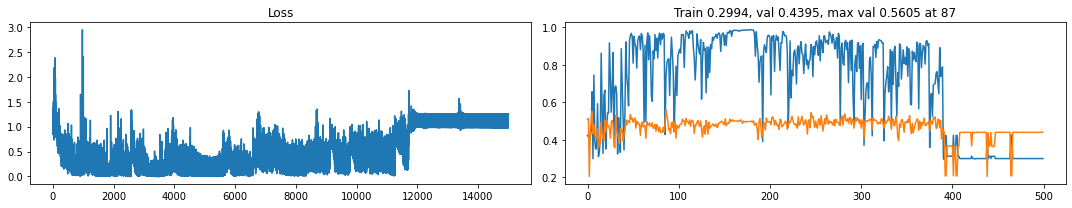

100%|██████████| 500/500 [17:48<00:00,  2.14s/it]


In [ ]:
seminar_utils.set_random_seeds(device=device)
#batch_size = inputs.shape[1]
batch_size = 32
epochs = 500
hidden_dim_size = 120
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, num_workers=4)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=batch_size, num_workers=4)

model = LSTM(input_size = inputs.shape[1], hidden_dim_size =  hidden_dim_size, number_of_targets = 3)
#loss_function = torch.nn.MSELoss()
loss_function =torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-1, momentum=0.9)
#optimizer = torch.optim.Adam(model.parameters())
scheduler = torch.optim.lr_scheduler.MultiStepLR(optimizer, milestones=(int(epochs/10), int(epochs/3)), gamma=1/10)

train(model, optimizer, loss_function, train_loader, val_loader, device, epochs_n=epochs)

Пара RNN клеток внутри линейных слоёв

In [ ]:
from torch.nn.modules.rnn import RNNCell
class RNN(torch.nn.Module):
    def __init__(self, input_size, hidden_dim_size, number_of_targets):
        r"""
        Parameters
        ----------
        input_size : int
        hidden_dim_size : int
        number_of_targets : int
        """
        super(RNN, self).__init__()

        self.hidden_size = 128
        self.hidden_size2 = 32
        
        #input_size = input_image_size[0] * input_image_size[1] * input_image_size[2]
        #number_of_targets = 1

        self.stage1 = torch.nn.Sequential(
            torch.nn.Linear(input_size, hidden_dim_size),
            #torch.nn.RNN(input_size, 20, hidden_dim_size),
            torch.nn.ReLU(),
            torch.nn.BatchNorm1d(hidden_dim_size),  ## <---
            torch.nn.Linear(hidden_dim_size, 120)
        )
        self.rnn1 = torch.nn.RNNCell(120, self.hidden_size)
        self.rnn2 = torch.nn.RNNCell(self.hidden_size, self.hidden_size2)
        self.stage2 = torch.nn.Sequential(
            torch.nn.Linear(self.hidden_size2, hidden_dim_size),
            torch.nn.LeakyReLU(),
            torch.nn.BatchNorm1d(hidden_dim_size),
            torch.nn.Linear(hidden_dim_size, number_of_targets)
        )
        
    def forward(self, x):
        r"""
        Parameters
        ----------
        x : torch.Tensor
            of shape [batch_size, vector_size]
        
        Returns
        -------
        y : torch.Tensor
            of shape [batch_size, 1]
        """
        batch_size = len(x)
        x = x.reshape(batch_size, -1)
        #print(x)
        x = self.stage1(x)
        #print(x.shape)
        h_1 = self.rnn1(x)
        h_2 = self.rnn2(h_1)
        return self.stage2(h_2)

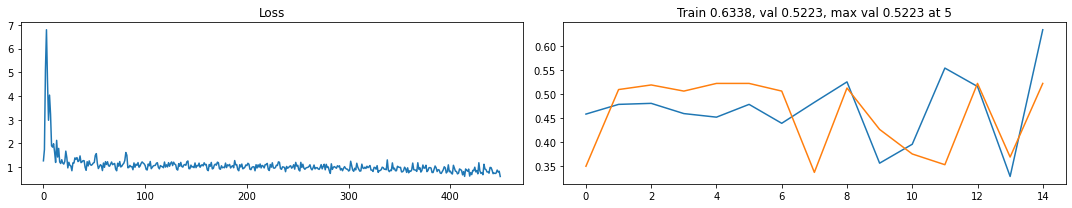

100%|██████████| 15/15 [00:31<00:00,  2.11s/it]

156 90 68


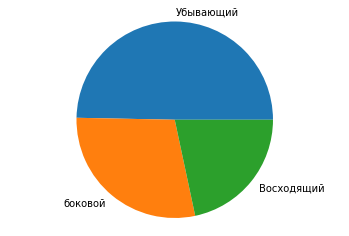

In [ ]:
seminar_utils.set_random_seeds(device=device)
#batch_size = inputs.shape[1]
batch_size = 32
epochs = 15
hidden_dim_size = 120
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, num_workers=4)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=batch_size, num_workers=4)

model = RNN(input_size = inputs.shape[1], hidden_dim_size =  hidden_dim_size, number_of_targets = 3)
#loss_function = torch.nn.MSELoss()
loss_function =torch.nn.CrossEntropyLoss()
#optimizer = torch.optim.SGD(model.parameters(), lr=1e-1, momentum=0.9)
#optimizer = torch.optim.Adam(model.parameters())
#optimizer = torch.optim.Adagrad(model.parameters())
optimizer = torch.optim.RMSprop(model.parameters())
scheduler = torch.optim.lr_scheduler.MultiStepLR(optimizer, milestones=(int(epochs/10), int(epochs/3)), gamma=1/10)

train(model, optimizer, loss_function, train_loader, val_loader, device, epochs_n=epochs)

Убедимся, что параметр границы тренда определён разумно

414 444 398


(-1.1069846675636454,
 1.1003326032173164,
 -1.1105534748606192,
 1.1035250952620752)

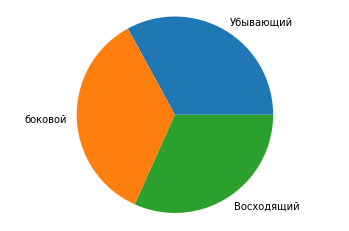

In [ ]:
print(Key_ticker_values_list_test.count(0), Key_ticker_values_list_test.count(1), Key_ticker_values_list_test.count(2))
vals = [Key_ticker_values_list_test.count(0), Key_ticker_values_list_test.count(1), Key_ticker_values_list_test.count(2)]
labels = ["Убывающий", "боковой", "Восходящий"]
fig, ax = plt.subplots()
ax.pie(vals, labels=labels)
ax.axis("equal")

Дальнейший код не является допустимым к запуску... Это лишь наброски.

In [ ]:
class CNNBN(torch.nn.Module):
    def __init__(self, input_size, number_of_targets):
        super().__init__()
        in_channels = input_size
        
        self.stage1 = torch.nn.Sequential(
            torch.nn.Conv1d(in_channels=in_channels, out_channels=8, kernel_size=3, padding=1),
            torch.nn.BatchNorm1d(8),  ## <---
            torch.nn.Conv1d(in_channels=8, out_channels=8, kernel_size=3, padding=1),
            torch.nn.ReLU(),
            torch.nn.MaxPool1d(kernel_size=2),
            torch.nn.BatchNorm1d(8),  ## <---
        )
        self.stage2 = torch.nn.Sequential(
            torch.nn.Conv1d(in_channels=8, out_channels=16, kernel_size=3, padding=1),
            torch.nn.BatchNorm1d(16),  ## <---
            torch.nn.Conv1d(in_channels=16, out_channels=16, kernel_size=3, padding=1),
            torch.nn.ReLU(),
            torch.nn.MaxPool1d(kernel_size=2),
            torch.nn.BatchNorm1d(16),  ## <---
        )
        self.fc = torch.nn.Sequential(
            torch.nn.Linear(16, 20),
            torch.nn.ReLU(),
            torch.nn.BatchNorm1d(20),  ## <---
            torch.nn.Linear(20, number_of_targets)
        )
        
    def forward(self, x):
        batch_size = x.shape[0]
        
        x = self.stage1(x)
        x = self.stage2(x)
        x = x.reshape(batch_size, -1)
        x = self.fc(x)
        return x

In [ ]:
class MLP_for_classification(torch.nn.Module):
    def __init__(self, input_size, hidden_dim_size, number_of_targets):
        r"""
        Parameters
        ----------
        input_size : int
        hidden_dim_size : int
        number_of_targets : int
        """
        super().__init__()
        print(input_size, number_of_targets)
        #input_size = input_image_size[0] * input_image_size[1] * input_image_size[2]
        self.mlp = torch.nn.Sequential(
            #torch.nn.Linear(input_size, hidden_dim_size),
            #torch.nn.ReLU(),
            #torch.nn.Linear(hidden_dim_size, number_of_targets)
            torch.nn.Linear(input_size, number_of_targets)
        )
        
    def forward(self, x):
        r"""
        Parameters
        ----------
        x : torch.Tensor
            of shape [batch_size, vector_size]
        
        Returns
        -------
        y : torch.Tensor
            of shape [batch_size, 1]
        """
        batch_size = 64
        print("THIS IS XXX = ",x)
        #x = x.reshape(batch_size, -1)
        return self.mlp(x)

In [ ]:
batch_size = len(train_dataset[0][0])
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, num_workers=4)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=batch_size, num_workers=4)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [ ]:
inputs, targets = next(iter(train_loader))
#inputs.shape
model = MLP_for_classification(input_size = inputs.shape[1], hidden_dim_size = 120, number_of_targets = 3)
nn_outputs = model(inputs)
nn_outputs.shape
print(nn_outputs)

In [ ]:
# we choose the device that we will work on --- GPU or CPU
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
#device = torch.device('cpu')

def train_for_Classification(model, optimizer, loss_function, train_loader, val_loader, device, epochs_n=1, plot_each=1):
    # send the model to that device
    model = model.to(device)
    # initialize some visualization code that you don't need to care about
    monitor = seminar_utils.Monitor()
    # one full cycle on train data is called epoch
    for epoch in trange(epochs_n):
        # switch the model to the train mode
        # later on we will have some modules that function differently in train and test mode
        model.train()
        for model_input, target in train_loader:
            #print(model_input, "and", target)
            # send data to device
            model_input = model_input.to(device)
            target = target.to(device)
            # calculate outputs and loss
            print("INPUT = ", model_input)
            print("Target = ", target)
            model_output = model(model_input)
            print("OUTPUT = ", model_output)
            loss = loss_function(model_output, target)
            # update model weights
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            # do some visualization
            monitor.add_loss_value(loss.item())
        
        # evaluate the model
        # switch the model to the test mode
        model.eval()
        train_accuracy = seminar_utils.get_accuracy(model, train_loader, device)
        val_accuracy = seminar_utils.get_accuracy(model, val_loader, device)
        print(train_accuracy, "with", val_accuracy)
        monitor.add_train_accuracy_value(train_accuracy)
        monitor.add_val_accuracy_value(val_accuracy)
        
        if epoch % plot_each == 0:
            monitor.show()

In [ ]:
seminar_utils.set_random_seeds(device=device)
#batch_size = len(train_dataset[0][0])
batch_size = 64
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, num_workers=4)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=batch_size, num_workers=4)

model = MLP_for_classification(input_size = len(train_dataset[0][0]), hidden_dim_size = 120, number_of_targets = 3)
loss_function = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-1, momentum=0.9)

train_for_Classification(model, optimizer, loss_function, train_loader, val_loader, device, epochs_n=10, plot_each = 1)